In [2]:
#import igraph
#from igraph import *
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
#g = nx.erdos_renyi_graph(10, 0.5)
#nx.write_gml(g, '/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

Enter Number of Test cases: 1
Enter PAYOFF for Initial bahaviour: 3
Enter PAYOFF for New bahaviour: 10
Enter number of inital seeds that you want to give: 5
Enter seed value: 2
Enter seed value: 3
Enter seed value: 4
Enter seed value: 5
Enter seed value: 6
Initial seed input given by the user is:  [2, 3, 4, 5, 6]
For the provided initial seed input for new bahaviour the cascade is complete


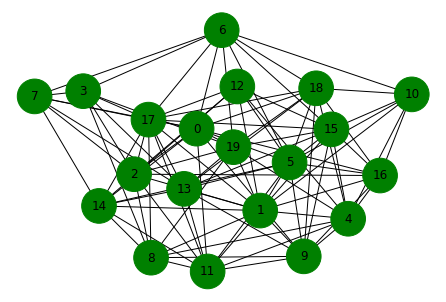

In [5]:
t = int(input('Enter Number of Test cases: '))
g = nx.erdos_renyi_graph(20, 0.5)

#g = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

while(t):
    
    b = int(input('Enter PAYOFF for Initial bahaviour: '))
    a = int(input('Enter PAYOFF for New bahaviour: '))
   
    def col_fun(g):
        infected_seed=[]
        for each in g.nodes():
            if g.nodes[each]['behaviour']=='initial_behaviour':
                infected_seed.append('yellow')
            else:
                infected_seed.append('green')
        return infected_seed

    def find_neigh(each, c, g):
        num=0
        for each1 in g.neighbors(each):
            if g.nodes[each1]['behaviour']==c:
                num=num+1
        return num

    def recalculate_options(g):
        dict1= {}
        #Payoff(A) =a=4
        #Payoff(B) =b=3
        #a=5
        #b=2
       # a = int(input('Enter payoff for new bahaviour: '))
        #b = int(input('Enter payoff for initial bahaviour: '))
        for each in g.nodes():
            num_A = find_neigh(each, 'new_behaviour', g)
            num_B = find_neigh(each, 'initial_behaviour', g)
            payoff_A=a*num_A
            payoff_B=b*num_B
            if payoff_A >= payoff_B:
                dict1[each]='new_behaviour'
            else:
                dict1[each]= 'initial_behaviour'
        return dict1

    def reset_node_attributes(g, behaviour_di):
        for each in behaviour_di:
            g.nodes[each]['behaviour']= behaviour_di[each]
        
    def terminate_1(c, g):
        f=1
        for each in g.nodes():
            if g.nodes[each]['behaviour']!=c:
                f=0
                break
        return f

    def terminate(g, count):
        flag1=terminate_1('new_behaviour', g)
        flag2=terminate_1('initial_behaviour',g)
        if flag1==1 or flag2==1 or count>=100:
            return 1
        else:
            return 0
    

    external_behaviour = "new_behaviour"
    bahaviour_1 = "initial_behaviour"
    for each in g.nodes():
        g.nodes[each]['behaviour'] = bahaviour_1
    
    #n1 = input()
    #n2 = input()
    #infected_seed = [2,5,8]
    infected_seed = []
    n= int(input("Enter number of inital seeds that you want to give: "))

    for i in range(0,n):
        seed_val = int(input('Enter seed value: '))
        infected_seed.append(seed_val)
    
    print('Initial seed input given by the user is: ', infected_seed)
    
    
    

    for each in infected_seed:
        g.nodes[each]['behaviour'] = external_behaviour 
    
    #colors = col_fun(g)

    #a = input("payoff for A: ")
    #b= input("payoff for B: ")
    temp =0
    count =0
    while(1):
        temp = terminate(g, count)
        if temp==1:
            break
        count = count+1
        behaviour_di  = recalculate_options(g)
        reset_node_attributes(g, behaviour_di)
        colors = col_fun(g)

    c =terminate_1('new_behaviour', g)
    if c==1:
        print('For the provided initial seed input for new bahaviour the cascade is complete')
    else:
        print('For the provided initial seed input for new bahaviour the cascade is incomplete') 

    nx.draw(g,node_color= colors , node_size=1200,with_labels=True)
    plt.show()
    t=t-1



In [ ]:
#g = nx.read_gml('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/main_graph.gml')

In [12]:
#nx.draw(g, with_labels=True)

In [13]:
#set_all_B(g)

In [14]:
#list1=[2,5]

In [15]:
#colors= get_colors(g)

In [16]:
#nx.draw(g, node_color = colors, node_size=800, with_labels=True)
#plt.show()

In [39]:
#g = nx.parse_edgelist('/home/dheeraj/my_projects/my_project_env/practice/6th_sem_Academics/SocialNetworkAnalysis/HandsOn/Modeling_cascading/mygraph.csv')

Enter number of seed values: 2
7
9
[7, 9]


In [54]:
g.nodes[1]

{'action': 'A'}

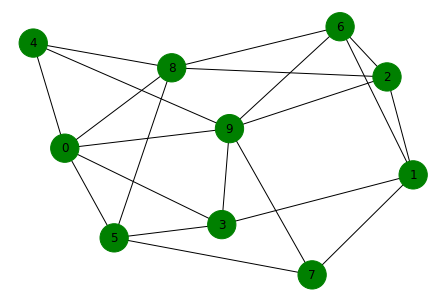

In [56]:
nx.draw(g,node_color= colors , node_size=800,with_labels=True)
plt.show()

In [57]:

#action_dict  = recalculate_options(g)


In [58]:
#reset_node_attributes(g, action_dict)

In [59]:
#colors = get_colors(g)

In [60]:
#nx.draw(g,node_color= colors , node_size=800,with_labels=True)
#plt.show()

cascade complete


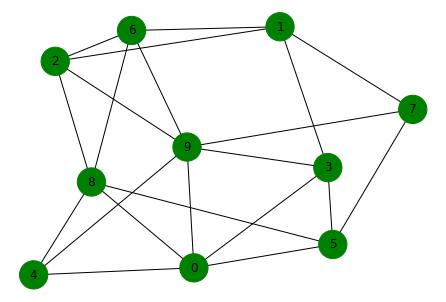

In [71]:
for u in g.nodes():
    for v in g.nodes():
        if u<v:
            print(u,v, ':')
            list1 = []
            list1.append(u)
            list1.append(v)
            
            
            action1 = "A"
            action2 = "B"
            for each in g.nodes():
                g.nodes[each]['action'] = action2
                
            for each in list1:
                g.nodes[each]['action'] = action1 
                
            flag =0
            count =0
            while(1):
                flag = terminate(g, count)
                if flag==1:
                    break
                count = count+1
                action_dict  = recalculate_options(g)
                reset_node_attributes(g, action_dict)
            colors = get_colors(g)

            c =terminate_1('A', g)
            if c==1:
                print('cascade complete')
            else:
                print('cascade incomplete') 

#nx.draw(g,node_color= colors , node_size=800,with_labels=True)
#plt.show()

0 1 :
cascade incomplete
0 2 :
cascade incomplete
0 3 :
cascade incomplete
0 4 :
cascade incomplete
0 5 :
cascade incomplete
0 6 :
cascade incomplete
0 7 :
cascade incomplete
0 8 :
cascade incomplete
0 9 :
cascade incomplete
1 2 :
cascade incomplete
1 3 :
cascade incomplete
1 4 :
cascade incomplete
1 5 :
cascade incomplete
1 6 :
cascade incomplete
1 7 :
cascade incomplete
1 8 :
cascade incomplete
1 9 :
cascade complete
2 3 :
cascade incomplete
2 4 :
cascade incomplete
2 5 :
cascade incomplete
2 6 :
cascade incomplete
2 7 :
cascade incomplete
2 8 :
cascade incomplete
2 9 :
cascade incomplete
3 4 :
cascade incomplete
3 5 :
cascade incomplete
3 6 :
cascade incomplete
3 7 :
cascade incomplete
3 8 :
cascade incomplete
3 9 :
cascade incomplete
4 5 :
cascade incomplete
4 6 :
cascade incomplete
4 7 :
cascade incomplete
4 8 :
cascade incomplete
4 9 :
cascade incomplete
5 6 :
cascade incomplete
5 7 :
cascade incomplete
5 8 :
cascade incomplete
5 9 :
cascade complete
6 7 :
cascade incomplete
6 8 